# **Social Media Sentiment Analysis**


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.
   </p>
</div>


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        1. Import Libraries
   </p>
</div>


In [1]:
pip install colorama

In [2]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colorama import Fore
import plotly.express as px

import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        3. Load Data
   </p>
</div>


In [4]:
df = pd.read_csv("/content/sentimentdataset.csv")

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


****Columns :****

* Text: Text content of the post.
* Sentiment: Sentiment of the post (positive, negative, or neutral).
* Timestamp: Date and time of the post.
* User: Username of the poster.
* Platform: Social media platform where the post was made (Twitter, Instagram, Facebook).
* Hashtags: Hashtags used in the post.
* Retweets: Number of retweets for the post.
* Likes: Number of likes for the post.
* Country: Country of origin for the poster.
* Year: Year in which the post was made.
* Month: Month in which the post was made.
* Day: Day of the month on which the post was made.
* Hour: Hour of the day at which the post was made.

In [6]:
def null_count():
    return pd.DataFrame({'features': df.columns,
                'dtypes': df.dtypes.values,
                'NaN count': df.isnull().sum().values,
                'NaN percentage': df.isnull().sum().values/df.shape[0]}).style.background_gradient(cmap='Set3',low=0.1,high=0.01)
null_count()

,features,dtypes,NaN count,NaN percentage
0,Unnamed: 0.1,int64,0,0.000000
1,Unnamed: 0,int64,0,0.000000
2,Text,object,0,0.000000
3,Sentiment,object,0,0.000000
4,Timestamp,object,0,0.000000
5,User,object,0,0.000000
6,Platform,object,0,0.000000
7,Hashtags,object,0,0.000000
8,Retweets,float64,0,0.000000
9,Likes,float64,0,0.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [10]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Unnamed: 0.1: 732 distinct values
Unnamed: 0: 732 distinct values
Text: 707 distinct values
Sentiment: 279 distinct values
Timestamp: 683 distinct values
User: 685 distinct values
Platform: 4 distinct values
Hashtags: 697 distinct values
Retweets: 26 distinct values
Likes: 38 distinct values
Country: 115 distinct values
Year: 14 distinct values
Month: 12 distinct values
Day: 31 distinct values
Hour: 22 distinct values


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        3. Feature Enginering
   </p>
</div>


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        Drop Columns
   </p>
</div>


In [11]:
df = df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0', 'Hashtags','Day', 'Hour','Sentiment'])

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Platform
   </p>
</div>


In [12]:
df['Platform'].value_counts()

,count
Platform,
Instagram,258
Facebook,231
Twitter,128
Twitter,115


In [13]:
df['Platform'] = df['Platform'].str.strip()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Country
   </p>
</div>


In [14]:
df['Country'].value_counts()

,count
Country,
USA,59
USA,55
UK,49
Canada,44
Australia,41
...,...
Ireland,1
Scotland,1
Kenya,1


In [15]:
df['Country'] = df['Country'].str.strip()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Timestamp
   </p>
</div>


In [16]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Day_of_Week'] = df['Timestamp'].dt.day_name()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Month
   </p>
</div>


In [17]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

df['Month'] = df['Month'].map(month_mapping)

df['Month'] = df['Month'].astype('object')

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Text
   </p>
</div>


In [18]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(treebank_tag):
    from nltk.corpus import wordnet
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'\s+', ' ', text.strip())
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    text = " ".join(text.split())
    tokens = word_tokenize(text)
    pos_tags = nltk.pos_tag(tokens)
    cleaned_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(pos)) for token,pos in pos_tags if token.lower() not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    return cleaned_text

nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')
nltk.download('omw-1.4')
df["Clean_Text"] = df["Text"].apply(clean)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Unique Columns
   </p>
</div>


In [19]:
specified_columns = ['Platform','Country', 'Year','Month','Day_of_Week']

for col in specified_columns:
    total_unique_values = df[col].nunique()
    print(f'Total unique values for {col}: {total_unique_values}')

    top_values = df[col].value_counts()

    colors = [Fore.RED, Fore.GREEN, Fore.YELLOW, Fore.BLUE, Fore.MAGENTA, Fore.CYAN, Fore.WHITE, Fore.LIGHTBLACK_EX, Fore.LIGHTRED_EX, Fore.LIGHTGREEN_EX]

    for i, (value, count) in enumerate(top_values.items()):
        color = colors[i % len(colors)]
        print(f'{color}{value}: {count}{Fore.RESET}')

    print('\n' + '=' * 30 + '\n')

Total unique values for Platform: 3
Instagram: 258
Twitter: 243
Facebook: 231


Total unique values for Country: 33
USA: 188
UK: 143
Canada: 135
Australia: 75
India: 70
Brazil: 17
France: 16
Japan: 15
Germany: 14
Italy: 11
Spain: 6
South Africa: 6
Greece: 5
Netherlands: 4
Switzerland: 3
Sweden: 2
Portugal: 2
Austria: 2
Belgium: 2
Denmark: 2
Czech Republic: 2
Jordan: 1
Peru: 1
Maldives: 1
China: 1
Cambodia: 1
Norway: 1
Colombia: 1
Ireland: 1
Jamaica: 1
Kenya: 1
Scotland: 1
Thailand: 1


Total unique values for Year: 14
2023: 289
2019: 73
2020: 69
2021: 63
2022: 63
2018: 56
2017: 43
2016: 38
2015: 19
2011: 4
2013: 4
2012: 4
2014: 4
2010: 3


Total unique values for Month: 12
February: 85
January: 82
August: 78
September: 77
June: 71
July: 62
April: 51
November: 49
October: 48
May: 46
March: 44
December: 39


Total unique values for Day_of_Week: 7
Sunday: 119
Saturday: 115
Tuesday: 110
Friday: 108
Monday: 97
Thursday: 95
Wednesday: 88




<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        4. E D A
   </p>
</div>


In [20]:
df1 = df.copy()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       4.1 Sentiment Analysis
   </p>
</div>


In [21]:
analyzer = SentimentIntensityAnalyzer()

df1['Vader_Score'] = df1['Clean_Text'].apply(lambda text: analyzer.polarity_scores(text)['compound'])

df1['Sentiment'] = df1['Vader_Score'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

print(df1[['Clean_Text', 'Vader_Score', 'Sentiment']].head())

                        Clean_Text  Vader_Score Sentiment
0         enjoy beautiful day park       0.7964  positive
1         traffic terrible morning      -0.4767  negative
2           finish amazing workout       0.5859  positive
3  excite upcoming weekend getaway       0.4767  positive
4    try new recipe dinner tonight       0.0000   neutral


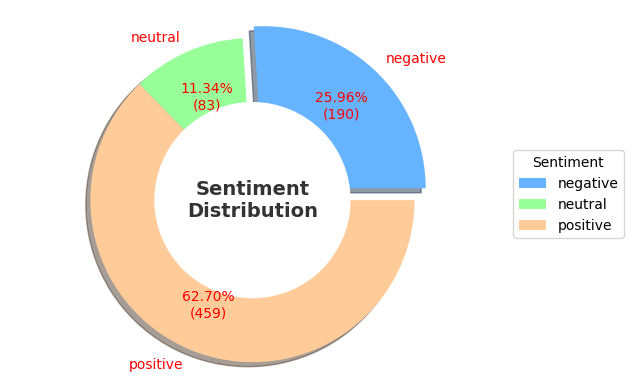

In [22]:
colors = ['#66b3ff', '#99ff99', '#ffcc99']

explode = (0.1, 0, 0)

sentiment_counts = df1.groupby("Sentiment").size()

fig, ax = plt.subplots()

wedges, texts, autotexts = ax.pie(
    x=sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p*sum(sentiment_counts)/100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10, color="r"),
    pctdistance=0.7,
    colors=colors,
    explode=explode,
    shadow=True)

center_circle = plt.Circle((0, 0), 0.6, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)

ax.text(0, 0, 'Sentiment\nDistribution', ha='center', va='center', fontsize=14, fontweight='bold', color='#333333')

ax.legend(sentiment_counts.index, title="Sentiment", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

ax.axis('equal')

plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Year
   </p>
</div>


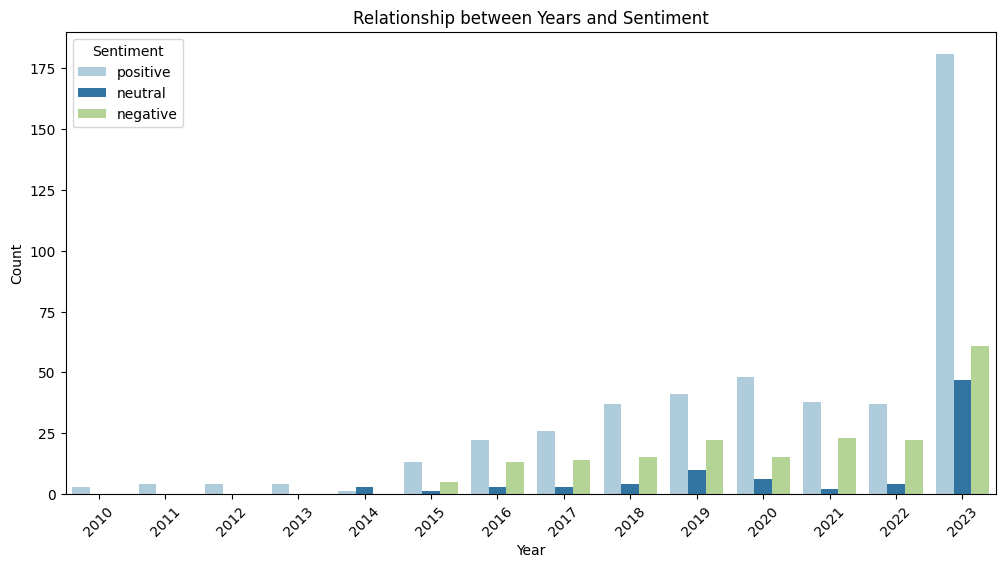

In [23]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Years and Sentiment')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Month
   </p>
</div>


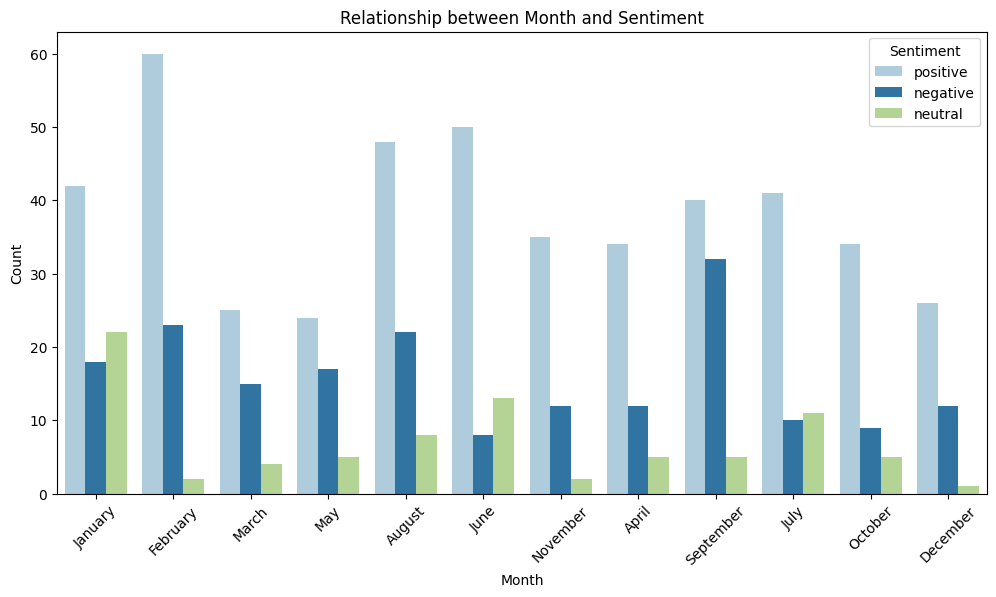

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Month and Sentiment')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Day Of Weeek
   </p>
</div>


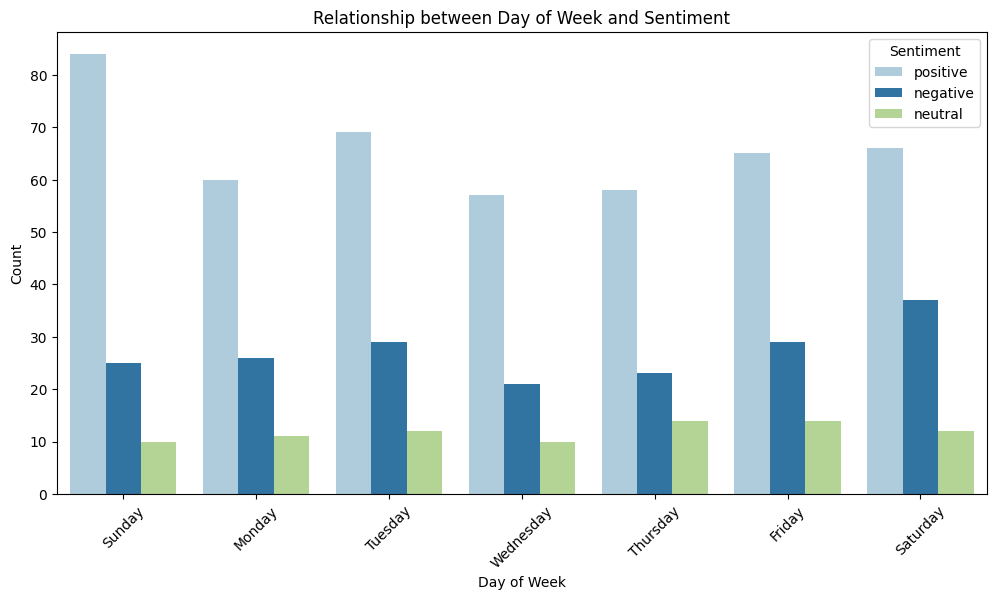

In [25]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Day_of_Week', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Day of Week and Sentiment')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Platform
   </p>
</div>


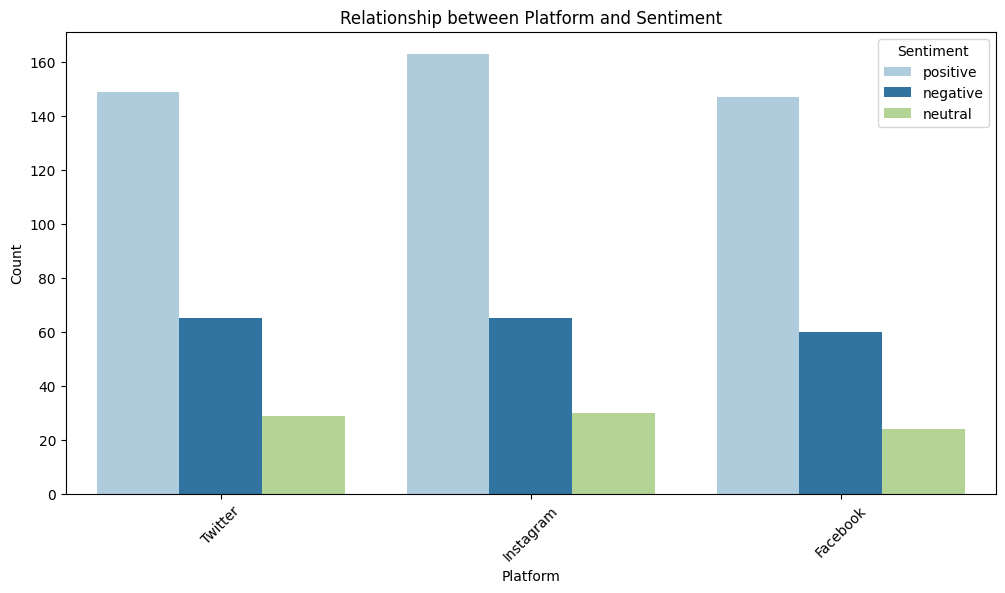

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df1, palette='Paired')
plt.title('Relationship between Platform and Sentiment')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Country
   </p>
</div>


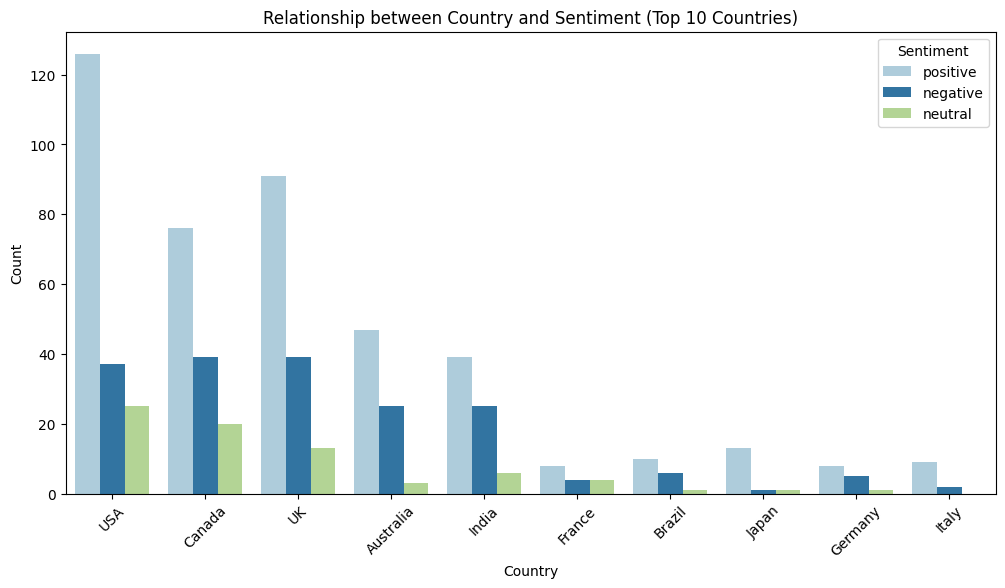

In [27]:
plt.figure(figsize=(12, 6))

top_10_countries = df1['Country'].value_counts().head(10).index

df_top_10_countries = df1[df1['Country'].isin(top_10_countries)]

sns.countplot(x='Country', hue='Sentiment', data=df_top_10_countries, palette='Paired')
plt.title('Relationship between Country and Sentiment (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
       4.2 Common Words
   </p>
</div>


In [28]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df.style.background_gradient(cmap='Blues')


,Common_words,count
0,new,43
1,life,31
2,day,29
3,challenge,29
4,dance,29
5,joy,28
6,like,28
7,moment,27
8,dream,27
9,feel,26


In [29]:
df1['temp_list'] = df1['Clean_Text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in df1['temp_list'] for item in sublist])
top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

fig = px.bar(top_words_df,
            x="count",
            y="Common_words",
            title='Common Words in Text Data',
            orientation='h',
            width=700,
            height=700,
            color='Common_words')

fig.show()


In [30]:
Positive_sent = df1[df1['Sentiment'] == 'positive']
Negative_sent = df1[df1['Sentiment'] == 'negative']
Neutral_sent = df1[df1['Sentiment'] == 'neutral']


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Positive Common Words
   </p>
</div>


In [31]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Greens')


,Common_words,count
0,new,29
1,challenge,27
2,joy,27
3,friend,24
4,laughter,24
5,embrace,23
6,beauty,20
7,find,20
8,dance,20
9,life,19


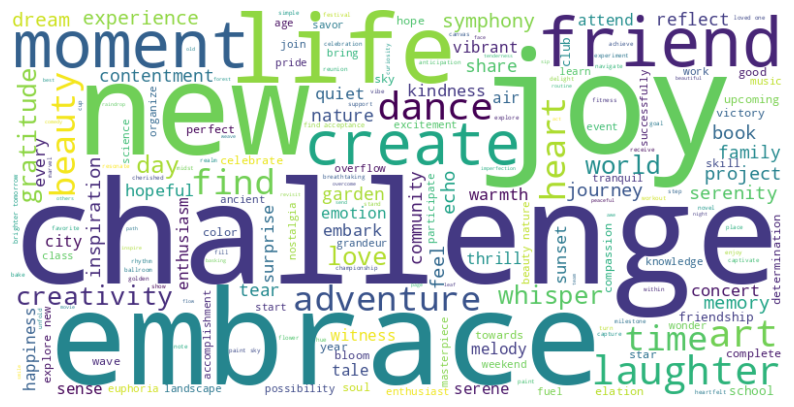

In [32]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'positive']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Neutral Common Words
   </p>
</div>


In [33]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Blues')


,Common_words,count
0,new,14
1,attend,8
2,explore,7
3,journey,7
4,night,7
5,concert,6
6,every,6
7,try,5
8,feel,5
9,day,5


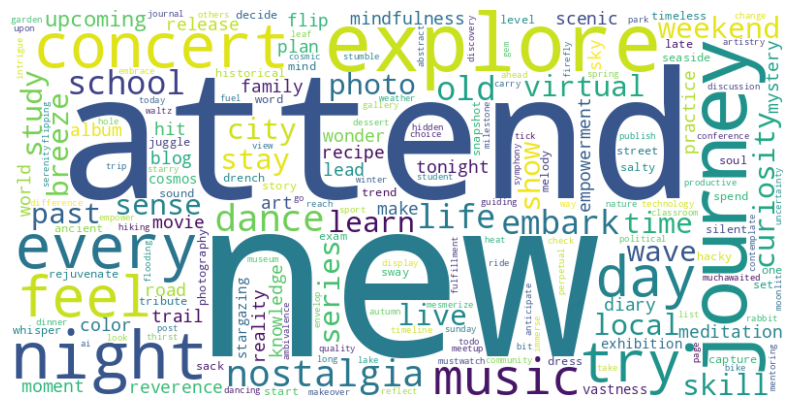

In [34]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'neutral']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
         Negative Common Words
   </p>
</div>


In [35]:
top = Counter([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive.style.background_gradient(cmap='Reds')


,Common_words,count
0,lose,15
1,despair,13
2,echo,13
3,day,12
4,heart,11
5,thought,11
6,emotion,11
7,like,11
8,feel,10
9,dream,10


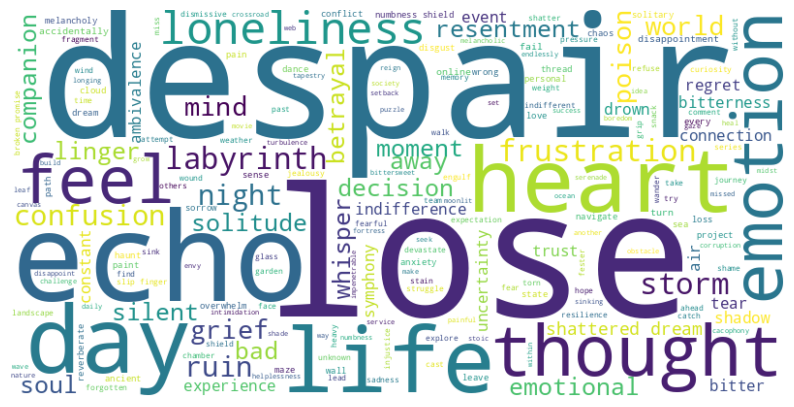

In [36]:
words = ' '.join([item for sublist in df1[df1['Sentiment'] == 'negative']['temp_list'] for item in sublist])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        5. Data Preparation
   </p>
</div>


In [37]:
df2 = df1.copy()

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree as sktree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
        5.1 Split Data
   </p>
</div>


In [39]:
X = df2['Clean_Text'].values
y = df2['Sentiment'].values

<Axes: xlabel='Sentiment'>

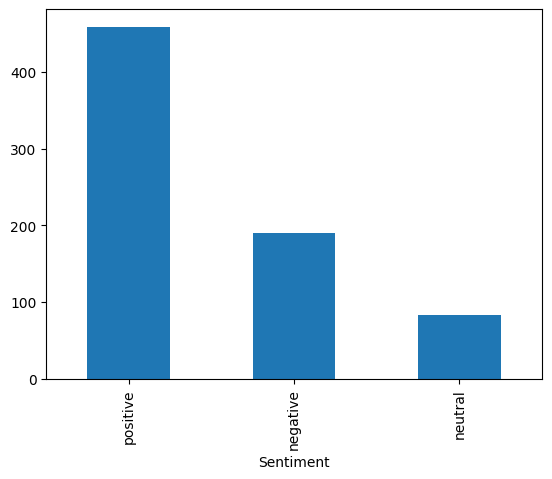

In [40]:
df2['Sentiment'].value_counts().plot(kind='bar')

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 15px; font-weight: bold;">
        6. Modeling
   </p>
</div>


In [42]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Logistic Classifier
   </p>
</div>


In [43]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [44]:
y_train_pred = logistic_classifier.predict(X_train_tfidf)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = logistic_classifier.predict(X_test_tfidf)
test_accuracy = accuracy_score(y_test, y_test_pred)

classification_rep_logistic = classification_report(y_test, y_test_pred)

In [45]:
print("Logistic Regression Results:")
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy:  {test_accuracy:.4f}")
print("\nClassification Report (Test Set):\n", classification_rep_logistic)


Logistic Regression Results:
Train Accuracy: 0.8752
Test Accuracy:  0.7551

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       1.00      0.50      0.67        38
     neutral       0.00      0.00      0.00        17
    positive       0.72      1.00      0.84        92

    accuracy                           0.76       147
   macro avg       0.57      0.50      0.50       147
weighted avg       0.71      0.76      0.70       147



<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       Regularized Logistic Classifier
   </p>
</div>


In [56]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

logistic = LogisticRegression(max_iter=200, random_state=42)

grid_search = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

best_logistic = grid_search.best_estimator_

y_train_pred = best_logistic.predict(X_train_tfidf)
y_test_pred = best_logistic.predict(X_test_tfidf)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

class_report = classification_report(y_test, y_test_pred)

print("Logistic Regression with Regularization Results:")
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")
print("\nClassification Report (Test Set):\n", class_report)
print("Best Parameters Found:", grid_search.best_params_)


Logistic Regression with Regularization Results:
Train Accuracy: 1.0000
Test Accuracy:  0.8367

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       0.94      0.82      0.87        38
     neutral       0.75      0.18      0.29        17
    positive       0.81      0.97      0.88        92

    accuracy                           0.84       147
   macro avg       0.83      0.65      0.68       147
weighted avg       0.84      0.84      0.81       147

Best Parameters Found: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
     Decision Tree Classifier
   </p>
</div>

In [46]:
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(random_state=42)

In [50]:
y_train_pred_dt = decision_tree_classifier.predict(X_train_tfidf)
train_accuracy_dt = accuracy_score(y_train, y_train_pred_dt)

y_test_pred_dt = decision_tree_classifier.predict(X_test_tfidf)
test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)

classification_rep_dt = classification_report(y_test, y_test_pred_dt)

In [48]:
print("Decision Tree Results:")
print(f"Train Accuracy: {train_accuracy_dt:.4f}")
print(f"Test Accuracy:  {test_accuracy_dt:.4f}")
print("\nClassification Report (Test Set):\n", classification_rep_dt)

Decision Tree Results:
Train Accuracy: 1.0000
Test Accuracy:  0.7551

Classification Report (Test Set):
               precision    recall  f1-score   support

    negative       0.88      0.76      0.82        38
     neutral       0.17      0.12      0.14        17
    positive       0.78      0.87      0.82        92

    accuracy                           0.76       147
   macro avg       0.61      0.58      0.59       147
weighted avg       0.74      0.76      0.74       147



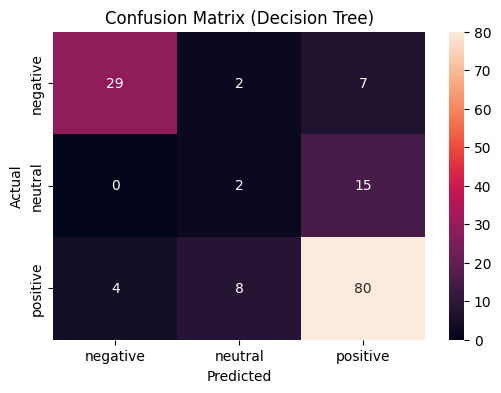

In [55]:
cm = confusion_matrix(y_test, y_test_pred_dt, labels=decision_tree_classifier.classes_)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=decision_tree_classifier.classes_,
            yticklabels=decision_tree_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()

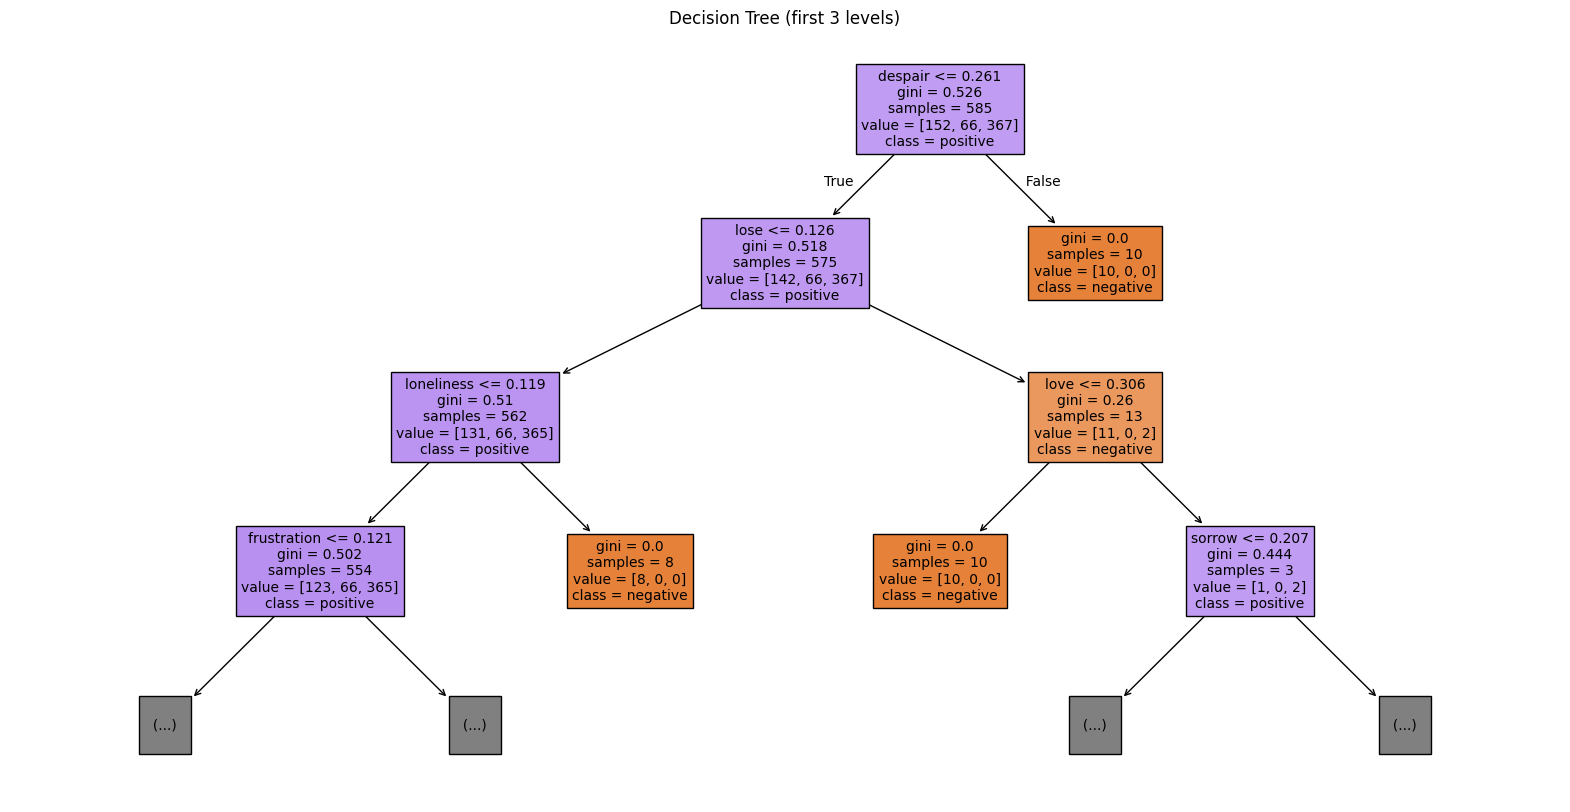

In [52]:
plt.figure(figsize=(20,10))
try:
    feature_names = vectorizer.get_feature_names_out()
except:
    feature_names = None

sktree.plot_tree(decision_tree_classifier, filled=True, feature_names=feature_names, class_names=[str(c) for c in decision_tree_classifier.classes_], max_depth=3, fontsize=10)
plt.title('Decision Tree (first 3 levels)')
plt.show()


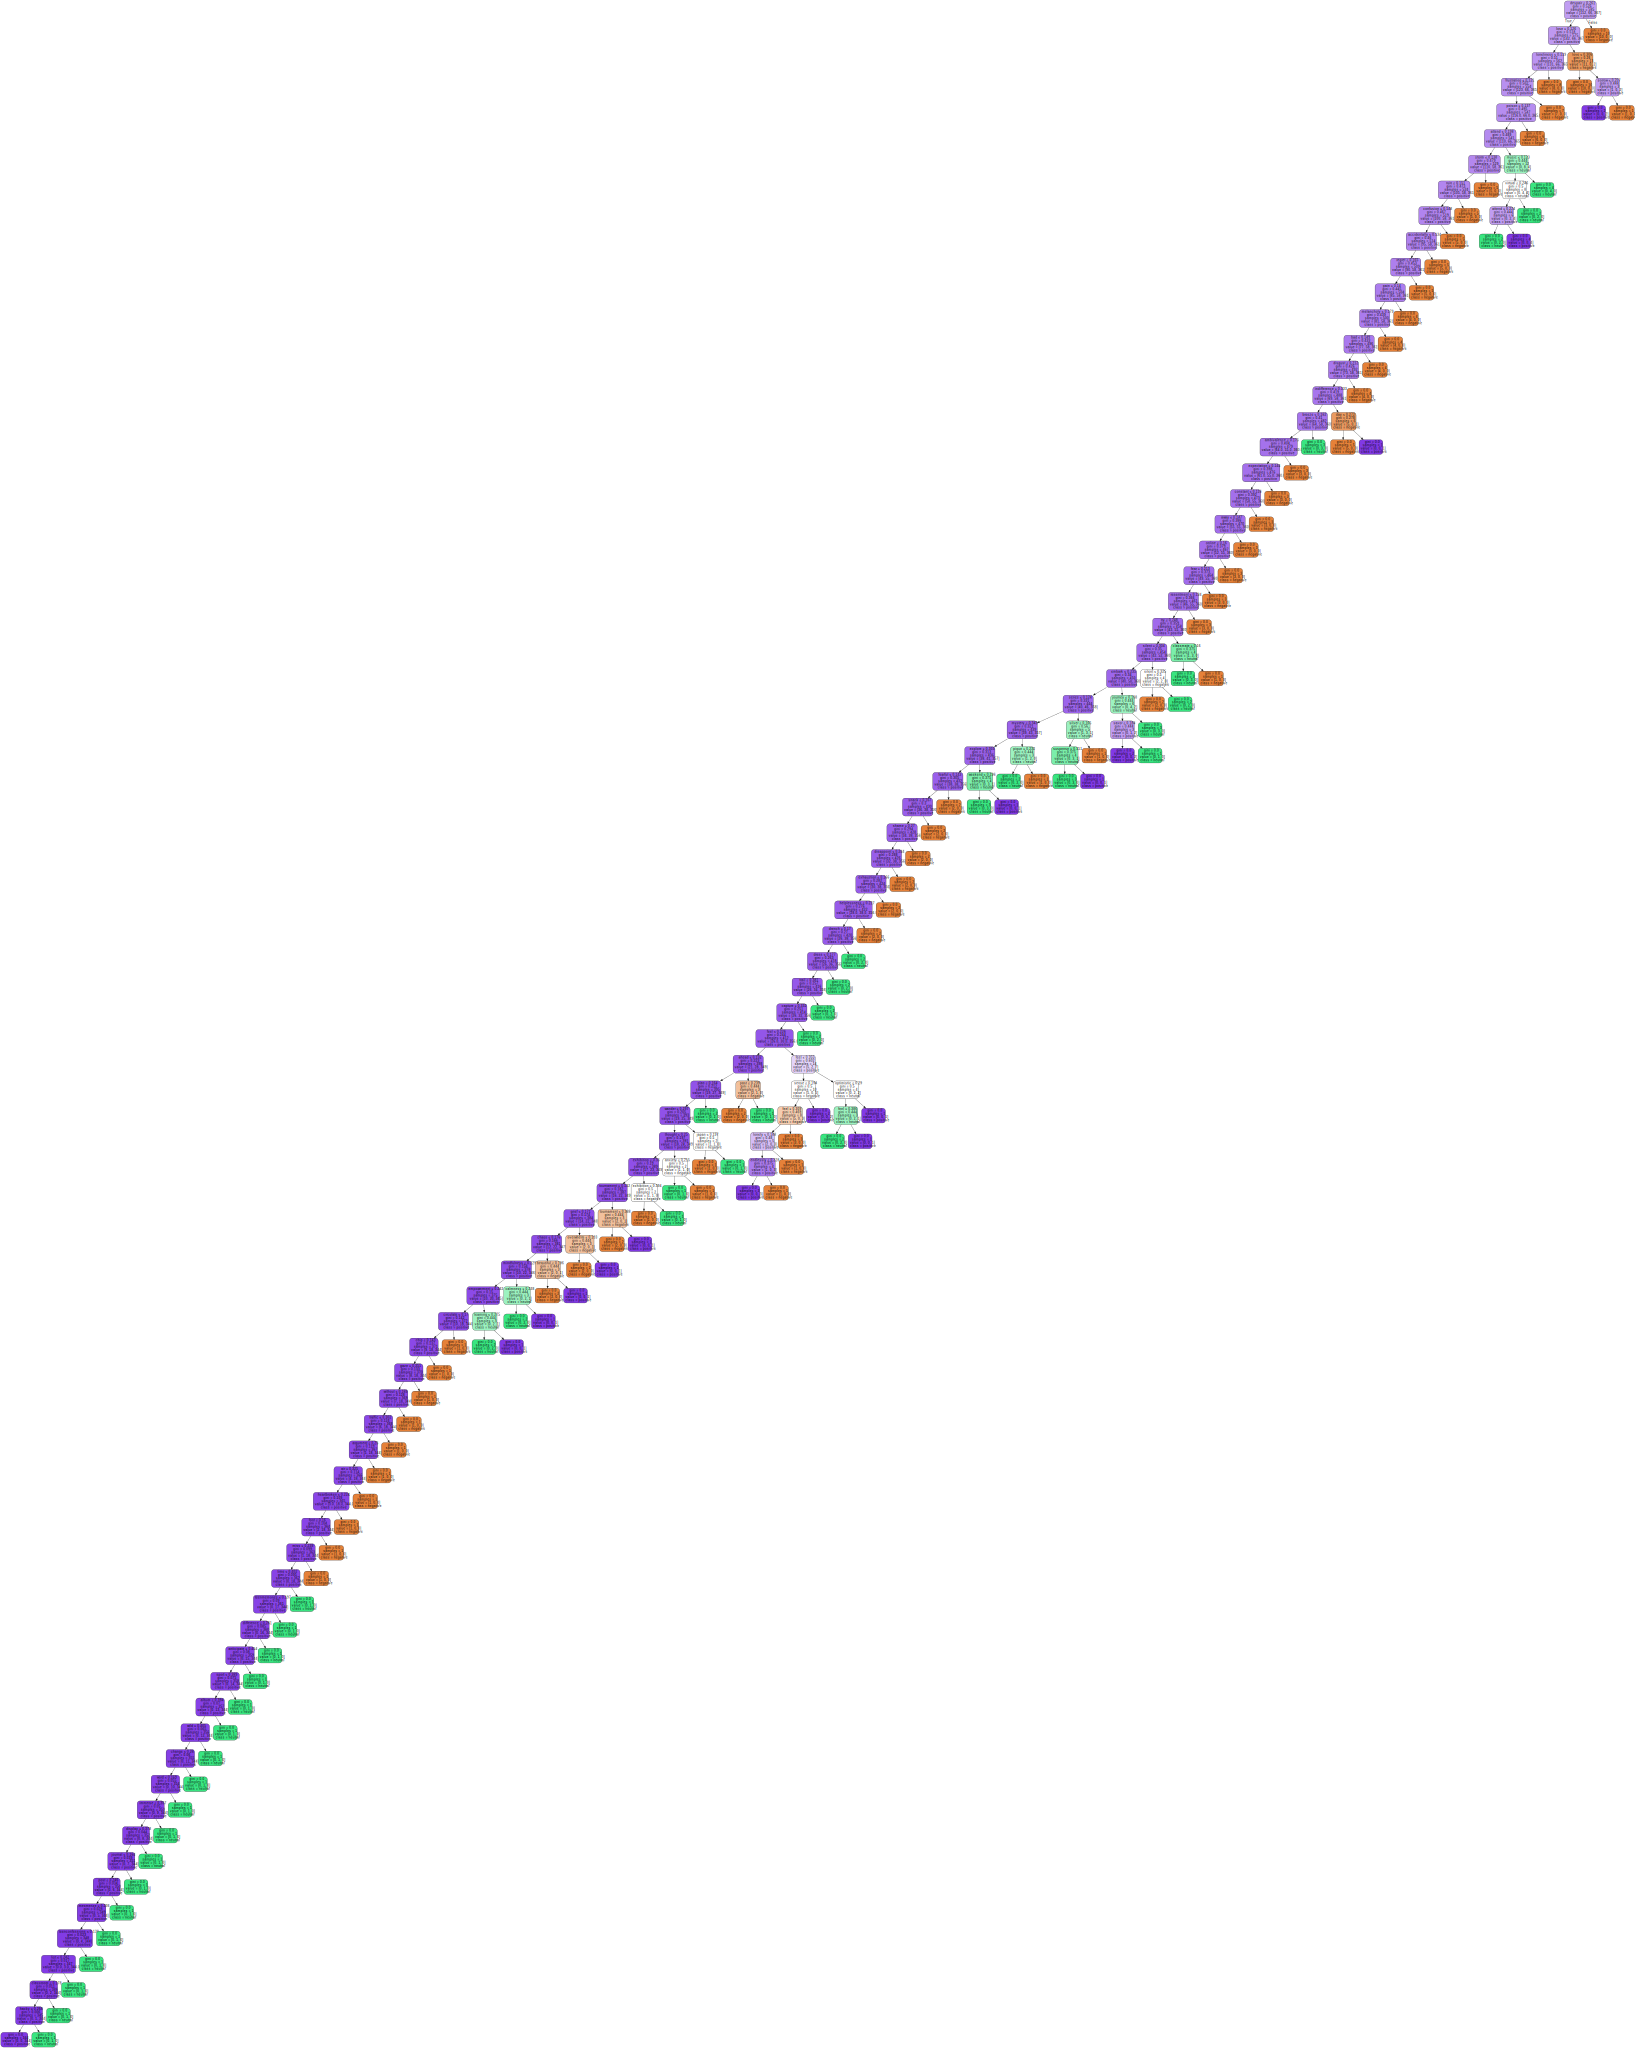

In [53]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(decision_tree_classifier,
                           out_file=None,
                           feature_names=vectorizer.get_feature_names_out(),
                           class_names=[str(c) for c in decision_tree_classifier.classes_],
                           filled=True, rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_full", format="png", cleanup=True)
graph


<div style="background-color: purple; padding: 15px; border-radius: 10px;">
    <p style="color: white; font-size: 12px; font-weight: bold;">
       7. Predicting Sentiment
   </p>
</div>


In [62]:
def predict_sentiment(sentences):
    """
    Predicts sentiment for a list of sentences using Logistic Regression with regularization.
    Returns a list of dictionaries with input, cleaned text, predicted sentiment, and probabilities.
    """
    if isinstance(sentences, str):
        sentences = [sentences]

    results = []
    for sentence in sentences:
        cleaned = clean(sentence)

        vect = vectorizer.transform([cleaned])

        pred = best_logistic.predict(vect)[0]

        output = {
            "input": sentence,
            "cleaned": cleaned,
            "predicted_sentiment": pred
        }

        probs = best_logistic.predict_proba(vect)[0]
        output["probabilities"] = dict(zip(best_logistic.classes_, probs))

        results.append(output)

    return results

sample_inputs = [
    "I absolutely loved the battery life and camera on this phone!",
    "It ruined my day.",
    "New journeys should be explored!"
]

predictions = predict_sentiment(sample_inputs)

import pandas as pd
df_results = pd.DataFrame(predictions)
print(df_results)


                                               input  \
0  I absolutely loved the battery life and camera...   
1                                  It ruined my day.   
2                   New journeys should be explored!   

                                     cleaned predicted_sentiment  \
0  absolutely love battery life camera phone            positive   
1                                   ruin day            negative   
2                        new journey explore             neutral   

                                       probabilities  
0  {'negative': 0.14281502559496284, 'neutral': 0...  
1  {'negative': 0.8396374724838117, 'neutral': 0....  
2  {'negative': 0.010000056589393354, 'neutral': ...  


In [60]:
def predict_sentiment_lr(sentences):
    """
    Predicts sentiment for a list of sentences using Decision Tree Classifier.
    Returns a list of dictionaries with input, cleaned text, predicted sentiment, and probabilities.
    """
    if isinstance(sentences, str):
        sentences = [sentences]

    results = []
    for sentence in sentences:
        cleaned = clean(sentence)
        vect = vectorizer.transform([cleaned])
        pred = decision_tree_classifier.predict(vect)[0]
        output = {"input": sentence, "cleaned": cleaned, "predicted_sentiment": pred}
        try:
            probs = decision_tree_classifier.predict_proba(vect)[0]
            output["probabilities"] = dict(zip(decision_tree_classifier.classes_, probs))
        except Exception:
            output["probabilities"] = "predict_proba not available for this estimator"
        results.append(output)
    return results

sample_inputs = [
    "I absolutely loved the battery life and camera on this phone!",
    "It ruined my day.",
    "New journeys should be explored!"
]

predictions = predict_sentiment_lr(sample_inputs)

import pandas as pd
df_results = pd.DataFrame(predictions)
print(df_results)


                                               input  \
0  I absolutely loved the battery life and camera...   
1                                  It ruined my day.   
2                   New journeys should be explored!   

                                     cleaned predicted_sentiment  \
0  absolutely love battery life camera phone            positive   
1                                   ruin day            negative   
2                        new journey explore             neutral   

                                       probabilities  
0  {'negative': 0.0, 'neutral': 0.0, 'positive': ...  
1  {'negative': 1.0, 'neutral': 0.0, 'positive': ...  
2  {'negative': 0.0, 'neutral': 1.0, 'positive': ...  
